# Loading All the DataSets


In [1]:
import pandas as pd 
vancouver_datasets = pd.read_csv("datasets/Vancouver_all_crimes.csv")
tor_assault_datasets = pd.read_csv("datasets/Toronto_Assaults.csv")
tor_break_and_enter = pd.read_csv("datasets/Toronto_break_and_enter.csv")
tor_homicides = pd.read_csv("datasets/Toronto_Homicides.csv")

# PRINTING ALL DATASETS

In [2]:
vancouver_datasets

,TYPE,YEAR,MONTH,DAY,HOUR,MINUTE,HUNDRED_BLOCK,NEIGHBOURHOOD,X,Y
0,Break and Enter Commercial,2012,12,14,8,52,NaN,Oakridge,491285.0000,5.453433e+06
1,Break and Enter Commercial,2019,3,7,2,6,10XX SITKA SQ,Fairview,490612.9648,5.457110e+06
2,Break and Enter Commercial,2019,8,27,4,12,10XX ALBERNI ST,West End,491004.8164,5.459177e+06
3,Break and Enter Commercial,2021,4,26,4,44,10XX ALBERNI ST,West End,491007.7798,5.459174e+06
4,Break and Enter Commercial,2014,8,8,5,13,10XX ALBERNI ST,West End,491015.9434,5.459166e+06
...,...,...,...,...,...,...,...,...,...,...
910705,Vehicle Collision or Pedestrian Struck (with I...,2018,8,4,16,22,YUKON ST / W BROADWAY AVE,Mount Pleasant,491786.0000,5.456719e+06
910706,Vehicle Collision or Pedestrian Struck (with I...,2020,8,5,13,48,YUKON ST / W BROADWAY AVE,Mount Pleasant,491786.0000,5.456719e+06
910707,Vehicle Collision or Pedestrian Struck (with I...,2023,2,22,11,18,YUKON ST / W BROADWAY AVE,Mount Pleasant,491786.0000,5.456719e+06
910708,Vehicle Collision or Pedestrian Struck (with I...,2003,9,1,20,45,YUKON ST / W KING EDWARD AVE,Riley Park,491786.0000,5.455143e+06


In [3]:
tor_assault_datasets

,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y
0,1,GO-20141260715,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,3,...,Assault,Assault,092,Corso Italia-Davenport (92),092,Corso Italia-Davenport (92),-79.455770,43.677775,-8.844976e+06,5.415712e+06
1,2,GO-20141260730,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,3,...,Assault,Assault,105,Lawrence Park North (105),105,Lawrence Park North (105),-79.406223,43.727681,-8.839460e+06,5.423396e+06
2,3,GO-20141260597,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,2,...,Assault,Assault,080,Palmerston-Little Italy (80),080,Palmerston-Little Italy (80),-79.415594,43.654946,-8.840503e+06,5.412199e+06
3,4,GO-20141259762,1/1/2014 5:00:00 AM,12/31/2013 5:00:00 AM,2014,January,1,1,Wednesday,2,...,Assault,Assault,164,Wellington Place (164),077,Waterfront Communities-The Island (77),-79.390786,43.649125,-8.837742e+06,5.411303e+06
4,5,GO-20141260264,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,1,...,Assault,Assault,143,West Rouge (143),131,Rouge (131),-79.132915,43.780413,-8.809036e+06,5.431523e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
223613,223614,GO-20242820719,12/31/2024 5:00:00 AM,12/31/2024 5:00:00 AM,2024,December,31,366,Tuesday,21,...,Assault,Assault,NSA,NSA,NSA,NSA,0.000000,0.000000,6.327780e-09,5.664924e-09
223614,223615,GO-20242814621,12/31/2024 5:00:00 AM,12/31/2024 5:00:00 AM,2024,December,31,366,Tuesday,0,...,Assault,Assault,168,Downtown Yonge East (168),075,Church-Yonge Corridor (75),-79.380675,43.655770,-8.836616e+06,5.412325e+06
223615,223616,GO-20242814621,12/31/2024 5:00:00 AM,12/31/2024 5:00:00 AM,2024,December,31,366,Tuesday,0,...,Assault,Assault,168,Downtown Yonge East (168),075,Church-Yonge Corridor (75),-79.380675,43.655770,-8.836616e+06,5.412325e+06
223616,223617,GO-20242814621,12/31/2024 5:00:00 AM,12/31/2024 5:00:00 AM,2024,December,31,366,Tuesday,0,...,Assault,Assault,168,Downtown Yonge East (168),075,Church-Yonge Corridor (75),-79.380675,43.655770,-8.836616e+06,5.412325e+06


In [4]:
tor_break_and_enter

,OBJECTID,EVENT_UNIQUE_ID,REPORT_DATE,OCC_DATE,REPORT_YEAR,REPORT_MONTH,REPORT_DAY,REPORT_DOY,REPORT_DOW,REPORT_HOUR,...,OFFENCE,MCI_CATEGORY,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y
0,1,GO-20141264862,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,23,...,B&E W'Intent,Break and Enter,156,Bendale-Glen Andrew (156),127,Bendale (127),-79.254241,43.776636,-8.822542e+06,5.430941e+06
1,2,GO-20141260701,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,3,...,B&E,Break and Enter,070,South Riverdale (70),070,South Riverdale (70),-79.350213,43.646289,-8.833225e+06,5.410867e+06
2,3,GO-20141263750,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,18,...,B&E,Break and Enter,095,Annex (95),095,Annex (95),-79.402006,43.668389,-8.838991e+06,5.414267e+06
3,4,GO-20141260521,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,2,...,B&E,Break and Enter,081,Trinity-Bellwoods (81),081,Trinity-Bellwoods (81),-79.412798,43.650928,-8.840192e+06,5.411580e+06
4,5,GO-20141261949,1/1/2014 5:00:00 AM,1/1/2014 5:00:00 AM,2014,January,1,1,Wednesday,10,...,B&E W'Intent,Break and Enter,054,O'Connor-Parkview (54),054,O'Connor-Parkview (54),-79.309002,43.708708,-8.828638e+06,5.420474e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77024,77025,GO-20242820227,12/31/2024 5:00:00 AM,12/31/2024 5:00:00 AM,2024,December,31,366,Tuesday,19,...,B&E,Break and Enter,098,Rosedale-Moore Park (98),098,Rosedale-Moore Park (98),-79.393265,43.690335,-8.838018e+06,5.417645e+06
77025,77026,GO-20242815015,12/31/2024 5:00:00 AM,12/31/2024 5:00:00 AM,2024,December,31,366,Tuesday,2,...,B&E,Break and Enter,008,Humber Heights-Westmount (8),008,Humber Heights-Westmount (8),-79.520581,43.695818,-8.852191e+06,5.418489e+06
77026,77027,GO-20242816268,12/31/2024 5:00:00 AM,12/30/2024 5:00:00 AM,2024,December,31,366,Tuesday,9,...,B&E,Break and Enter,148,East L'Amoreaux (148),117,L'Amoreaux (117),-79.299488,43.802200,-8.827579e+06,5.434883e+06
77027,77028,GO-20242815237,12/31/2024 5:00:00 AM,12/31/2024 5:00:00 AM,2024,December,31,366,Tuesday,4,...,B&E,Break and Enter,032,Englemount-Lawrence (32),032,Englemount-Lawrence (32),-79.433324,43.719406,-8.842477e+06,5.422122e+06


In [5]:
tor_homicides

,OBJECTID,EVENT_UNIQUE_ID,OCC_DATE,OCC_YEAR,OCC_MONTH,OCC_DAY,OCC_DOW,OCC_DOY,DIVISION,HOMICIDE_TYPE,HOOD_158,NEIGHBOURHOOD_158,HOOD_140,NEIGHBOURHOOD_140,LONG_WGS84,LAT_WGS84,x,y
0,1,GO-2004111878,1/3/2004 5:00:00 AM,2004,January,3,Saturday,3,D53,Other,098,Rosedale-Moore Park (98),098,Rosedale-Moore Park (98),-79.392828,43.685026,-8.837969e+06,5.416828e+06
1,2,GO-2004125755,1/8/2004 5:00:00 AM,2004,January,8,Thursday,8,D42,Shooting,142,Woburn North (142),137,Woburn (137),-79.233852,43.781782,-8.820272e+06,5.431734e+06
2,3,GO-2004136086,1/8/2004 5:00:00 AM,2004,January,8,Thursday,8,D42,Shooting,146,Malvern East (146),132,Malvern (132),-79.205574,43.810544,-8.817124e+06,5.436170e+06
3,4,GO-2004148619,1/25/2004 5:00:00 AM,2004,January,25,Sunday,25,D42,Shooting,144,Morningside Heights (144),131,Rouge (131),-79.204958,43.822997,-8.817056e+06,5.438091e+06
4,5,GO-2004148623,1/25/2004 5:00:00 AM,2004,January,25,Sunday,25,D13,Shooting,171,Junction-Wallace Emerson (171),093,Dovercourt-Wallace Emerson-Junction (93),-79.434387,43.670467,-8.842596e+06,5.414587e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1476,1477,GO-20242659607,12/8/2024 5:00:00 AM,2024,December,8,Sunday,343,D55,Shooting,069,Blake-Jones (69),069,Blake-Jones (69),-79.337215,43.674461,-8.831778e+06,5.415202e+06
1477,1478,GO-20242661659,12/9/2024 5:00:00 AM,2024,December,9,Monday,344,D13,Shooting,032,Englemount-Lawrence (32),032,Englemount-Lawrence (32),-79.441007,43.715986,-8.843332e+06,5.421595e+06
1478,1479,GO-20242734667,12/19/2024 5:00:00 AM,2024,December,19,Thursday,354,D43,Shooting,139,Scarborough Village (139),139,Scarborough Village (139),-79.218902,43.743177,-8.818608e+06,5.425784e+06
1479,1480,GO-20242749902,12/21/2024 5:00:00 AM,2024,December,21,Saturday,356,D13,Stabbing,092,Corso Italia-Davenport (92),092,Corso Italia-Davenport (92),-79.448631,43.676777,-8.844181e+06,5.415558e+06


<h2> Cleaning of Vancouver Dataset</h2>


In [6]:
vd = vancouver_datasets.sort_values(by = 'YEAR', ascending=True)

vd_final = vd[['TYPE', 'YEAR', 'NEIGHBOURHOOD']]
vd_final


,TYPE,YEAR,NEIGHBOURHOOD
467090,Other Theft,2003,Central Business District
57420,Break and Enter Residential/Other,2003,Fairview
57429,Break and Enter Residential/Other,2003,Fairview
57436,Break and Enter Residential/Other,2003,Fairview
57437,Break and Enter Residential/Other,2003,Fairview
...,...,...,...
628275,Theft from Vehicle,2025,Central Business District
184146,Mischief,2025,Central Business District
782483,Theft from Vehicle,2025,Central Business District
390557,Other Theft,2025,Kitsilano


<h2>Cleaning of Toronto Dataset</h2>

In [7]:
import pandas as pd
#fulfilling the first merge successfully
toronto_first_merge = pd.concat([tor_assault_datasets, tor_break_and_enter], axis=0)
toronto_first_merge['CRIMES'] = toronto_first_merge['MCI_CATEGORY'].combine_first(toronto_first_merge['OFFENCE'])
toronto_first_clean = toronto_first_merge.drop(columns = ['MCI_CATEGORY', 'OFFENCE'])

toronto_first_clean.dropna()
#time to do the second cleaning with toronto_homicides
toronto_second_merge = pd.concat([toronto_first_clean, tor_homicides], axis = 0)
toronto_second_merge['CITY_CRIMES'] = toronto_second_merge['CRIMES'].combine_first(toronto_second_merge['HOMICIDE_TYPE'])

toronto_dataset = toronto_second_merge.drop(columns= ['CRIMES', 'HOMICIDE_TYPE'])

toronto_dataset = toronto_dataset[['CITY_CRIMES', 'OCC_YEAR', 'NEIGHBOURHOOD_158']]
toronto_dataset['OCC_YEAR'] = toronto_dataset['OCC_YEAR'].fillna(0).astype(int)
toronto_dataset


,CITY_CRIMES,OCC_YEAR,NEIGHBOURHOOD_158
0,Assault,2014,Corso Italia-Davenport (92)
1,Assault,2014,Lawrence Park North (105)
2,Assault,2014,Palmerston-Little Italy (80)
3,Assault,2013,Wellington Place (164)
4,Assault,2014,West Rouge (143)
...,...,...,...
1476,Shooting,2024,Blake-Jones (69)
1477,Shooting,2024,Englemount-Lawrence (32)
1478,Shooting,2024,Scarborough Village (139)
1479,Stabbing,2024,Corso Italia-Davenport (92)


<h2>Visualizing Trends Over Time For Various Types of Vancouver Crimes</h2>

<Figure size 1400x800 with 0 Axes>

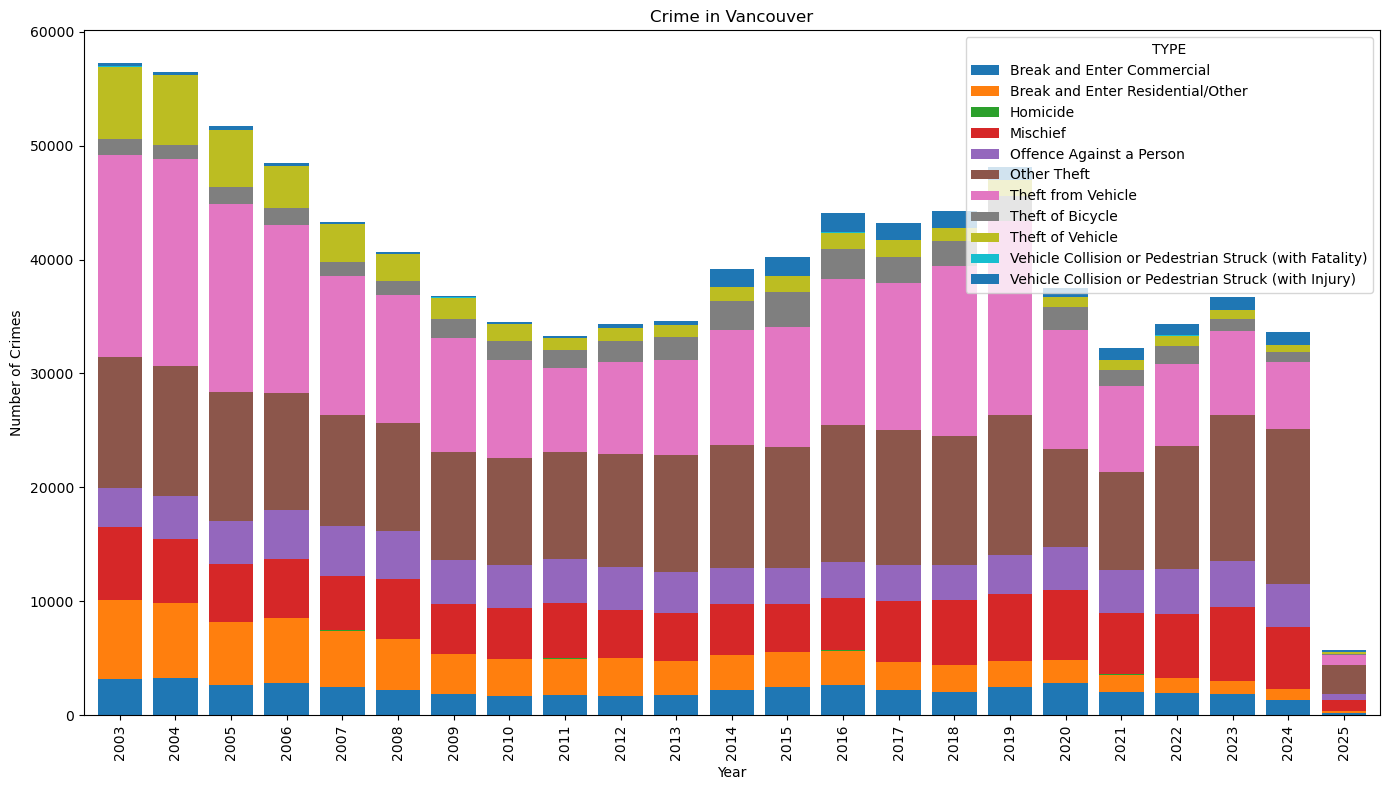

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Group by year and crime type
vd_grouped = vd_final.groupby(['YEAR', 'TYPE']).size().unstack().fillna(0)

# Plot Vancouver crime data
plt.figure(figsize=(14, 8))
vd_grouped.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.title('Crime in Vancouver')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()



<h2>Visualizing Trends Over Time For Various Types of Toronto Crimes</h2>

<Figure size 1400x800 with 0 Axes>

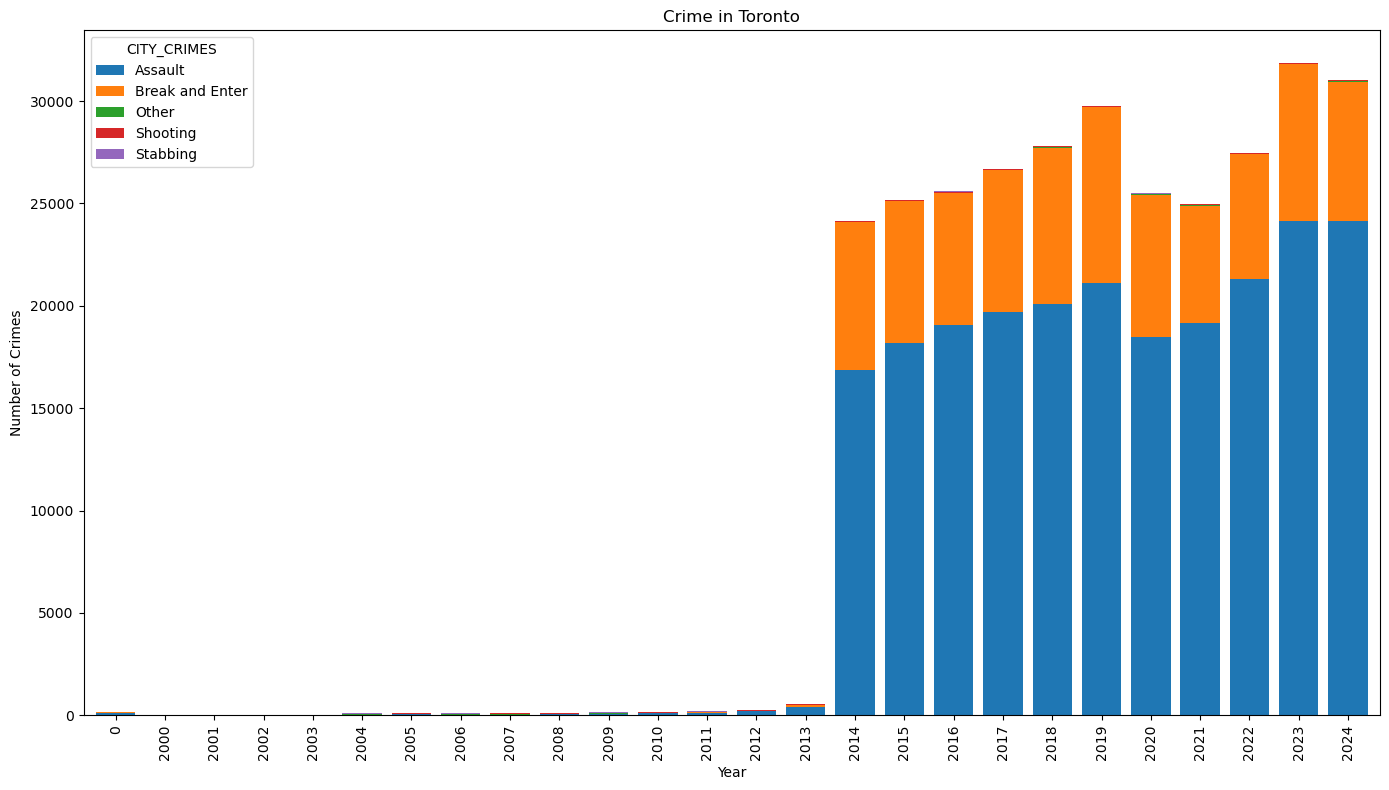

In [12]:
import matplotlib.pyplot as plt

toronto_grouped = toronto_dataset.groupby(['OCC_YEAR', 'CITY_CRIMES']).size().unstack().fillna(0)

plt.figure(figsize=(14, 8))
toronto_grouped.plot(kind='bar', stacked=True, figsize=(14, 8), width=0.8)
plt.title('Crime in Toronto')
plt.xlabel('Year')
plt.ylabel('Number of Crimes')
plt.tight_layout()
plt.show()
